# DCS 550 Data Mining (DSC550-T302 2227-1)
## Bellevue University
## 10.2 Exercise: Building a CNN Image Classifier
## Author: Jake Meyer
## Date: 8/10/2022

## Assignment Instructions:
In this exercise,  you will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset. The steps to build a CNN classifier are outlined in section 20.15 of the Machine Learning with Python Cookbook, but keep in mind that your code may need to be modified depending on your version of Keras.

<ol>
    <li> Load the MNIST data set.
    <li> Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook. Compare these to the first five training labels.
    <li> Build and train a Keras CNN classifier on the MNIST training set.
    <li> Report the test accuracy of your model.
    <li> Display a confusion matrix on the test set classifications.
    <li> Summarize your results.
<ol>

In [1]:
'''
Install OpenCV-python, keras, keras-tqdm, tensorflow, graphviz, and pydot.
'''
import sys
!{sys.executable} -m pip install OpenCV-python
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install keras-tqdm
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydot

In [28]:
'''
Import the necessary libraries to complete Exercise 10.2.
'''
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib as mpl
import graphviz
import pydot
from matplotlib import pyplot as plt
%matplotlib inline
import keras
import seaborn as sns
from numpy import unique, argmax
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,  Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras_tqdm import TQDMNotebookCallback
from tqdm import tqdm
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('cv2 version:', cv2.__version__)
print('matplotlib version:', mpl.__version__)
print('keras version:', keras.__version__)

numpy version: 1.20.3
cv2 version: 4.6.0
matplotlib version: 3.4.3
keras version: 2.9.0


### Part 1 - Load the MNIST data set.

In [4]:
'''
Load data and target from MNIST data and split into train and test data sets.
'''
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Part 2 - Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels. <br>

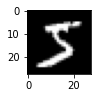

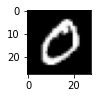

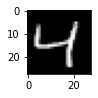

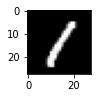

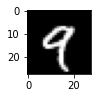

In [5]:
'''
Display the first 5 images in the training data set.
'''
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

### Part 3 - Build and train a Keras CNN classifier on the MNIST training set.

In [8]:
'''
Reshape the training and test data.
'''
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [9]:
'''
Normalize the values of pixels of images.
'''
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
'''
Determine the shape of the input images.
'''
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [14]:
'''
Build the model.
'''
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = img_shape))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(48, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [15]:
'''
View the model summary.
'''
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)             

In [17]:
'''
Compile the model.
Train the model.
'''
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, verbose = 2, validation_split = 0.1)

Epoch 1/10
422/422 - 11s - loss: 0.2500 - accuracy: 0.9242 - val_loss: 0.0583 - val_accuracy: 0.9832 - 11s/epoch - 26ms/step
Epoch 2/10
422/422 - 12s - loss: 0.0840 - accuracy: 0.9736 - val_loss: 0.0404 - val_accuracy: 0.9888 - 12s/epoch - 28ms/step
Epoch 3/10
422/422 - 12s - loss: 0.0602 - accuracy: 0.9816 - val_loss: 0.0393 - val_accuracy: 0.9872 - 12s/epoch - 28ms/step
Epoch 4/10
422/422 - 11s - loss: 0.0506 - accuracy: 0.9839 - val_loss: 0.0334 - val_accuracy: 0.9905 - 11s/epoch - 27ms/step
Epoch 5/10
422/422 - 11s - loss: 0.0418 - accuracy: 0.9868 - val_loss: 0.0325 - val_accuracy: 0.9907 - 11s/epoch - 27ms/step
Epoch 6/10
422/422 - 11s - loss: 0.0357 - accuracy: 0.9876 - val_loss: 0.0270 - val_accuracy: 0.9932 - 11s/epoch - 25ms/step
Epoch 7/10
422/422 - 10s - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0293 - val_accuracy: 0.9925 - 10s/epoch - 24ms/step
Epoch 8/10
422/422 - 10s - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.0263 - val_accuracy: 0.9930 - 10s/epoch - 25ms/step


### Part 4 - Report the test accuracy of your model.

In [20]:
'''
Show the model accuracy on the test data.
'''
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print("Accuracy on test set: {}%".format(round(accuracy*100,2)))

Accuracy on test set: 99.37%


### Part 5 - Display a confusion matrix on the test set classifications.

In [40]:
'''
Predictions for the x_test data.
'''
y_predicted = model.predict(x_test, verbose = 0)
y_pred = np.argmax(y_predicted, axis = 1)

In [41]:
'''
Create a confusion matrix from sklearn with confusion_matrix().
'''
confus_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of Test set predictions: \n', confus_mat)

Confusion Matrix of Test set predictions: 
 [[ 976    0    1    0    1    0    1    1    0    0]
 [   0 1132    0    0    0    0    1    2    0    0]
 [   1    0 1027    0    0    0    0    4    0    0]
 [   0    0    1 1004    0    2    0    1    2    0]
 [   0    0    0    0  976    0    3    1    0    2]
 [   0    0    0    5    0  886    1    0    0    0]
 [   2    1    0    0    1    3  951    0    0    0]
 [   0    1    6    0    0    0    0 1019    0    2]
 [   1    0    1    0    0    0    0    1  970    1]
 [   0    0    0    0    4    5    0    2    2  996]]


Text(33.0, 0.5, 'Predicted Label')

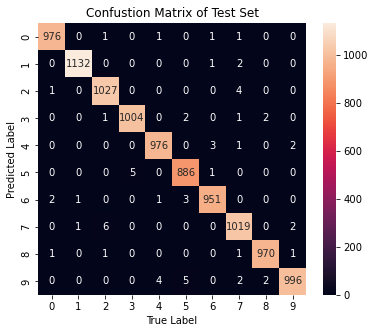

In [42]:
'''
Try to create a confusion matrix graph.
'''
plt.figure(figsize=(6,5))
sns.heatmap(confus_mat, annot=True, fmt='d')
plt.title('Confustion Matrix of Test Set')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### Part 6 - Summarize your results.

This week's assignment consisted of creating a CNN model to classify handwritten numbers from the MNIST dataset. The main highlights from the analysis are highlighted below:<br>
$\bullet$ The Convolutional Neural Network (CNN) had an accuracy of 99.37% on the test data set.  <br>
$\bullet$ Each number had at least one misclassification based on the confusion matrix. <br>
$\bullet$ The number with the most incorrect classifications was 9 (14 missclassifications). <br>
$\bullet$ The number with the least incorrect classifications was 1 (3 missclassifications). <br>
$\bullet$ The numbers 4, 5, 7 and 8 were misclassified as a 9 (14 times total). <br>
$\bullet$ The number 2 was misclassified as a 7 (6 times). <br>
$\bullet$ The number 3 was often misclassified as a 5 (5 times). <br>